<a href="https://colab.research.google.com/github/dnlgnwn-wq/IRIS/blob/main/BungaIrisdnl_NB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# ==============================
# IMPORT LIBRARY
# ==============================
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score


In [2]:
file_path = "/content/iris.csv"
data = pd.read_csv(file_path)

print("=== DATASET IRIS ===")
display(data.head())


=== DATASET IRIS ===


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
setosa = data[data['species'] == 'setosa']
versicolor = data[data['species'] == 'versicolor']
virginica = data[data['species'] == 'virginica']

print("Jumlah data per spesies:")
print("Setosa     :", len(setosa))
print("Versicolor :", len(versicolor))
print("Virginica  :", len(virginica))

Jumlah data per spesies:
Setosa     : 50
Versicolor : 50
Virginica  : 50


In [4]:
X = data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = data['species']

In [7]:
# Encode Label
le = LabelEncoder()
y_encoded = le.fit_transform(y)

print("\nLabel Mapping:")
for i, label in enumerate(le.classes_):
    print(i, "=", label)



Label Mapping:
0 = setosa
1 = versicolor
2 = virginica


In [6]:
# Normalisasi Fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
# Train dan Test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded,
    test_size=0.2,
    random_state=42,
    stratify=y_encoded
)

print("\nData train:", X_train.shape)
print("Data test :", X_test.shape)



Data train: (120, 4)
Data test : (30, 4)


In [9]:
# Training Model
model = GaussianNB()

print("\n=== Training Model Naive Bayes ===")
start_time = time.time()
model.fit(X_train, y_train)
end_time = time.time()

print(f"Training selesai dalam {end_time - start_time:.6f} detik")



=== Training Model Naive Bayes ===
Training selesai dalam 0.004337 detik


In [11]:
# Evaluasi
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)

acc = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr', average='macro')

print("\n=== HASIL EVALUASI NAIVE BAYES ===")
print(f"Akurasi : {acc * 100:.2f}%")
print(f"AUC     : {auc:.4f}\n")

print("Classification Report:")
print(classification_report(
    y_test, y_pred,
    target_names=le.classes_,
    digits=4
))



=== HASIL EVALUASI NAIVE BAYES ===
Akurasi : 96.67%
AUC     : 0.9900

Classification Report:
              precision    recall  f1-score   support

      setosa     1.0000    1.0000    1.0000        10
  versicolor     1.0000    0.9000    0.9474        10
   virginica     0.9091    1.0000    0.9524        10

    accuracy                         0.9667        30
   macro avg     0.9697    0.9667    0.9666        30
weighted avg     0.9697    0.9667    0.9666        30



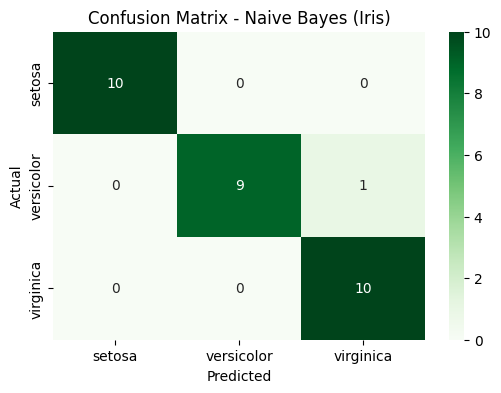

In [14]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Greens',
    xticklabels=le.classes_,
    yticklabels=le.classes_
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Naive Bayes (Iris)")
plt.show()


In [13]:
print("\n=== Prediksi Manual Iris (Naive Bayes) ===")
print("=== UKURAN DALAM CENTIMETER (CM) ===")

sepal_length = float(input("Masukkan sepal length: "))
sepal_width  = float(input("Masukkan sepal width : "))
petal_length = float(input("Masukkan petal length: "))
petal_width  = float(input("Masukkan petal width : "))

# Normalisasi input
input_scaled = scaler.transform([[sepal_length, sepal_width, petal_length, petal_width]])

# Prediksi
pred = model.predict(input_scaled)
pred_label = le.inverse_transform(pred)

print(f"\nJenis Bunga Iris: {pred_label[0]}")



=== Prediksi Manual Iris (Naive Bayes) ===
=== UKURAN DALAM CENTIMETER (CM) ===
Masukkan sepal length: 1
Masukkan sepal width : 2
Masukkan petal length: 3
Masukkan petal width : 4

Jenis Bunga Iris: virginica


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
